## Search Terms EDA

Out of the search terms from the created `combined_data` csv file we want to use the search terms for the models. For example use recipes that are tagged as `vegan` for our vegan model.

In this notebook we inspect the search terms and tags and create the new columns `vegan`, `vegetarian`, `glutenfree` and `lactosefree.

In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("data/combined_data.csv")

In [31]:
df_searchterms = df[['ReviewId', 'RecipeId', 'tags', 'search_terms']]

In [32]:
df_searchterms.head()

,ReviewId,RecipeId,tags,search_terms
0,2,992,"['30-minutes-or-less', 'time-to-make', 'course...","{'appetizer', 'low-carb'}"
1,13,7435,"['weeknight', 'time-to-make', 'course', 'main-...","{'irish', 'dinner'}"
2,14,44,"['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'low-sodium', 'low-carb', 'chicken'}"
3,17,5221,"['15-minutes-or-less', 'time-to-make', 'course...",{'salad'}
4,19,13307,"['60-minutes-or-less', 'time-to-make', 'course...","{'cookie', 'dessert', 'lunch'}"


### `Search_terms`-column

In [33]:
missing_search_terms = df_searchterms.isnull().sum()
missing_search_terms

ReviewId            0
RecipeId            0
tags            21045
search_terms    21045
dtype: int64

In [34]:
# Get a list of the search terms for filtering

# Convert the strings to actual sets using ast.literal_eval
import ast
df_searchterms['search_terms'] = df_searchterms['search_terms'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Flatten the sets into a single list
all_terms = [term for terms_set in df_searchterms['search_terms'] if pd.notna(terms_set) for term in terms_set]

# Create a pandas Series to easily get unique values and their counts
terms_series = pd.Series(all_terms)

# Get unique values and their counts
unique_terms_counts = terms_series.value_counts(dropna=False)

# Display the result
unique_terms_counts

C:\Users\kilia\AppData\Local\Temp\ipykernel_21056\1482662522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_searchterms['search_terms'] = df_searchterms['search_terms'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


dinner         369220
low-carb       177158
dessert        158486
low-calorie    130699
low-sodium     124916
                ...  
salt-free          40
meatless           40
atkins             30
nigerian           23
lowfat             11
Name: count, Length: 93, dtype: int64

In [43]:
unique_terms_counts.head(30), unique_terms_counts.shape

(dinner          369220
 low-carb        177158
 dessert         158486
 low-calorie     130699
 low-sodium      124916
 vegetarian      115092
 healthy         113151
 side             96239
 chicken          95568
 lunch            93757
 low-fat          81568
 bread            64849
 appetizer        59562
 breakfast        56057
 southern         43011
 cookie           35321
 italian          35312
 mexican          32898
 cake             32353
 soup             31346
 vegan            30063
 salad            29598
 gluten-free      25501
 casserole        23973
 pork             22489
 baked            22360
 snack            20653
 pasta            19637
 lactose-free     18598
 diabetic         17945
 Name: count, dtype: int64,
 (93,))

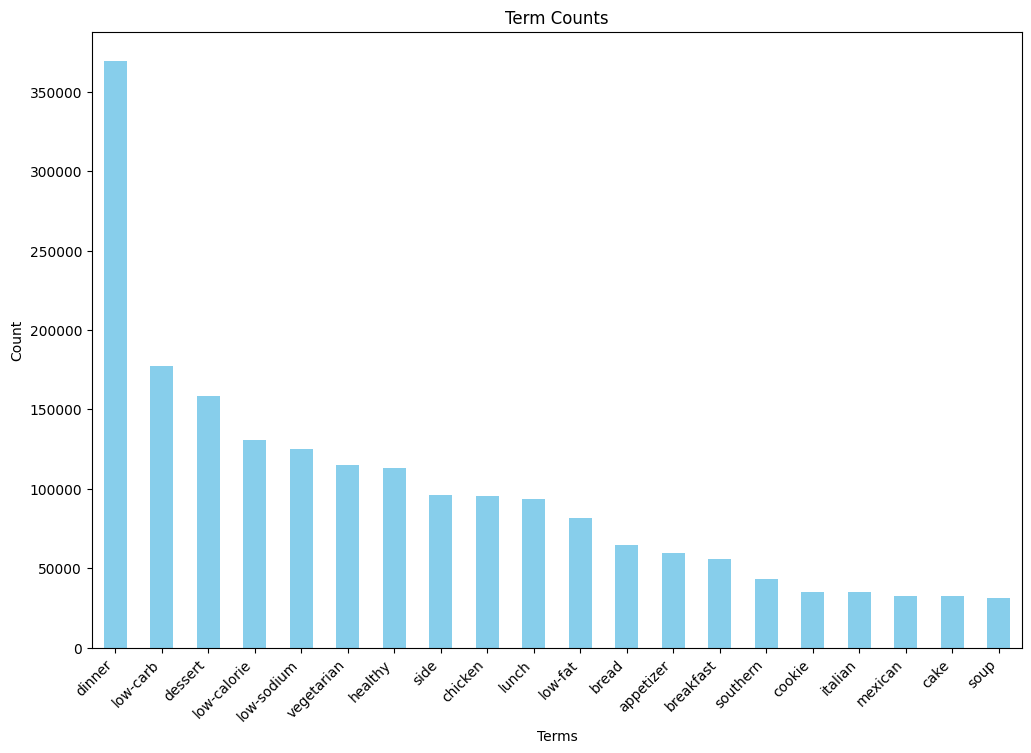

In [56]:
import matplotlib.pyplot as plt 

top30_terms = unique_terms_counts.head(20)


plt.figure(figsize=(12, 8))
top30_terms.plot(kind='bar', color='skyblue')
plt.xlabel('Terms')
plt.ylabel('Count')
plt.title('Term Counts')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
# plt.tight_layout()
plt.show()

Out of our 700k recipes we have ~ 20k without search terms. These we cannot include into our filtering. Therefore, if a user puts in a filter, we will not recommend the dishes with NaN in `search_terms`.

Our filters for the model that are interesting are:
- vegetarian
- vegan
- gluten-free
- lactose-free

### `Tags`-column

In [50]:
df_searchterms["tags"].head()

0    [30-minutes-or-less, time-to-make, course, mai...
1    [weeknight, time-to-make, course, main-ingredi...
2    [60-minutes-or-less, time-to-make, course, mai...
3    [15-minutes-or-less, time-to-make, course, mai...
4    [60-minutes-or-less, time-to-make, course, mai...
Name: tags, dtype: object

In [47]:
missing_tags = df_searchterms.isnull().sum()
missing_tags

ReviewId            0
RecipeId            0
tags            21045
search_terms    21045
dtype: int64

C:\Users\kilia\AppData\Local\Temp\ipykernel_21056\2103064667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_searchterms['tags'] = df_searchterms['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


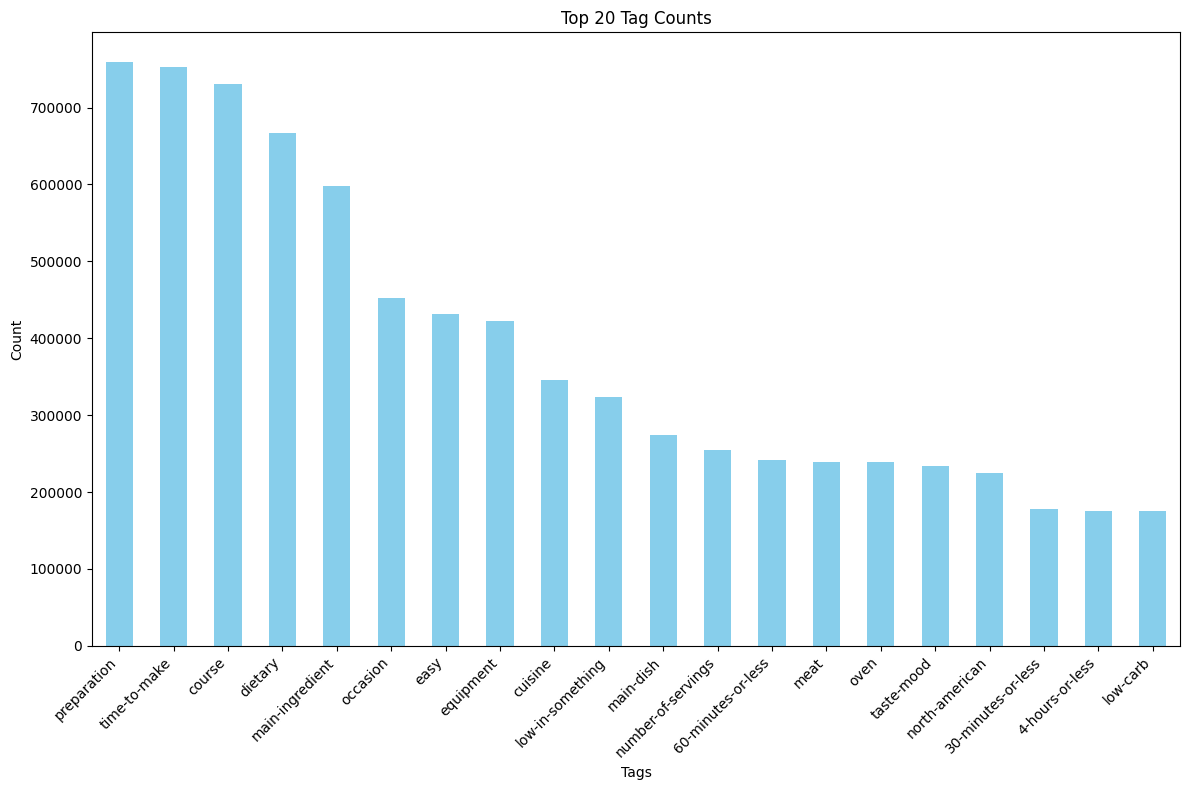

In [67]:
# Convert string representations to actual lists using ast.literal_eval
df_searchterms['tags'] = df_searchterms['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode the lists into separate rows, creating duplicates for rows with multiple tags
df_exploded = df_searchterms.explode('tags')

# Get unique values and their counts, including NaN values
unique_tags_counts = df_exploded['tags'].value_counts(dropna=False)

# Select the top 20 values
top_20_tags_counts = unique_tags_counts.head(20)

# Display the bar chart for the top 20 values
plt.figure(figsize=(12, 8))
top_20_tags_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.title('Top 20 Tag Counts')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.tight_layout()
plt.show()

Looking at the tags we can conclude that they are not usefull to us.